**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
class2_df=pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
class2_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
class2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
class2_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


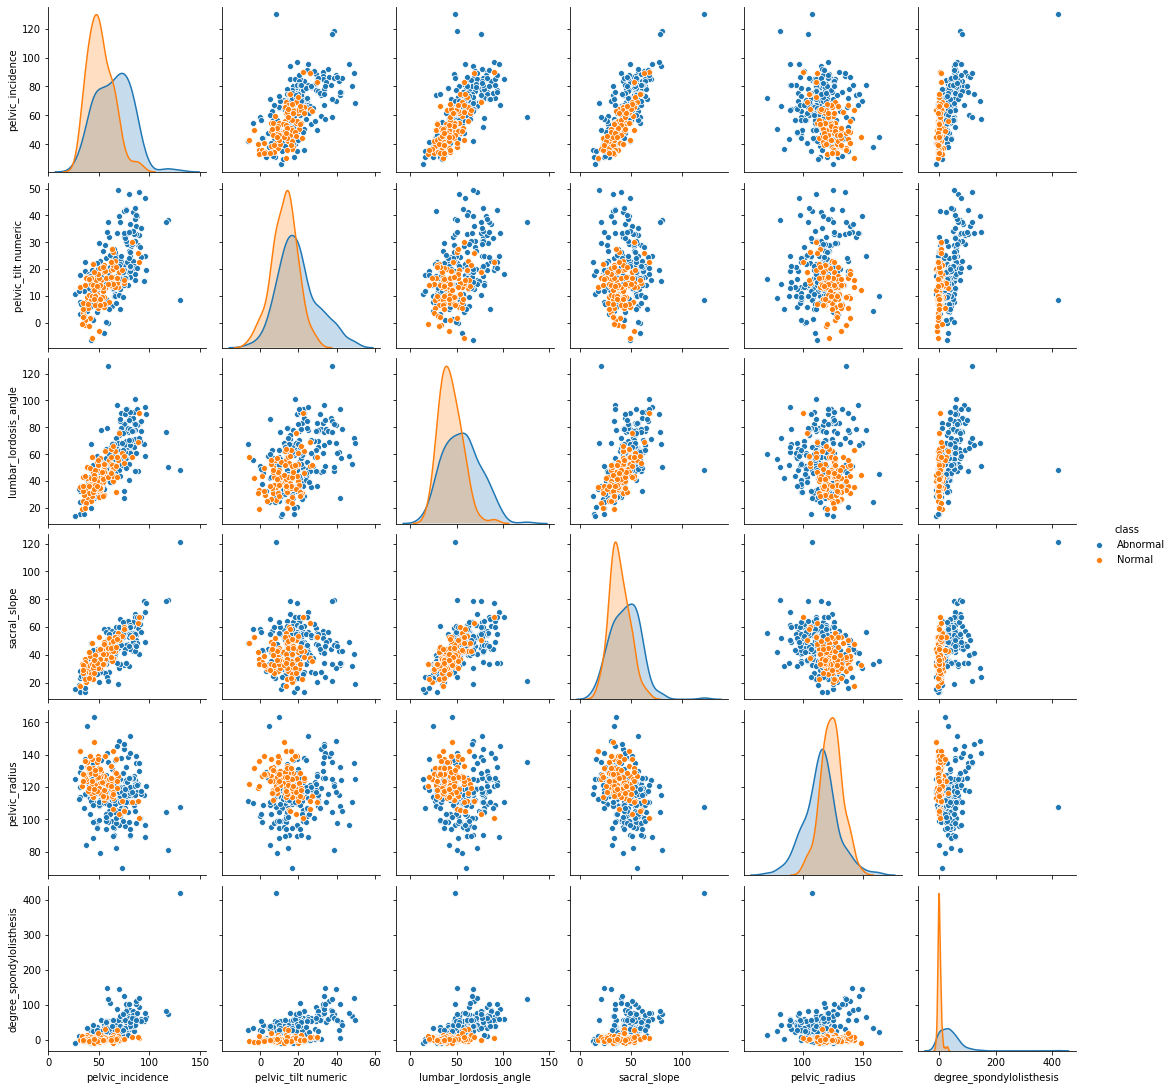

In [6]:
sns.pairplot(class2_df,hue='class')

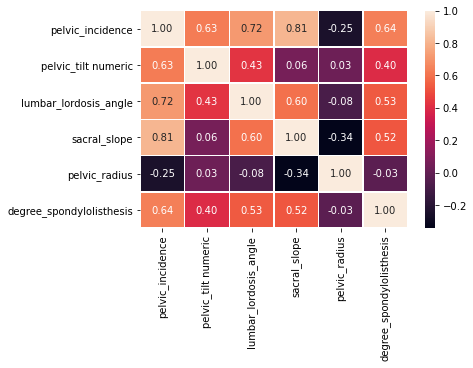

In [7]:
sns.heatmap(class2_df.corr(), annot=True, linewidths=.4, fmt= '.2f')

# Encode the Class variable to integer.

In [8]:
class2_df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder#using labelencoder to encode the data
le=LabelEncoder()

In [10]:
class2_df['class']=le.fit_transform(class2_df['class'])

In [11]:
class2_df.head().append(class2_df.tail())#checking encoded data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [12]:
class_target_df=class2_df['class']

In [13]:
class_feature_df=class2_df.drop(['class'],axis=1)

# Normalize your Data (X) to get values between 0 to 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler#using minmaxscaler for normalizing data between 0 and 1
mm_scaler=MinMaxScaler()

In [15]:
X=mm_scaler.fit_transform(class_feature_df)

# Split the dat as train and test with a ratio of 70:30.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,class_target_df,test_size = 0.3, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)#building model
knn.fit(X_train,y_train)#training model
knn.predict(X_test)#predicting 

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [20]:
print("{} nn score:{}".format(3,knn.score(X_test,y_test)))

3 nn score:0.7526881720430108


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

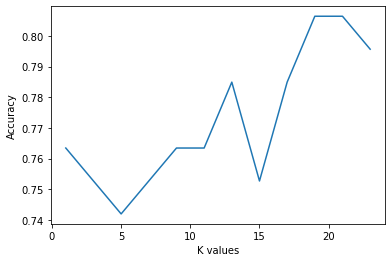

In [21]:
score_list = []
k=list(range(1,25,2))
for each in range(1,25,2):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
# Plotting graph
plt.plot(range(1,25,2),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

In [22]:
max(score_list)

0.8064516129032258

In [23]:
best_k = k[score_list.index(max(score_list))]
best_k

19

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [24]:
class3_df=pd.read_csv("3Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [25]:
class3_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [26]:
class3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [27]:
class3_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


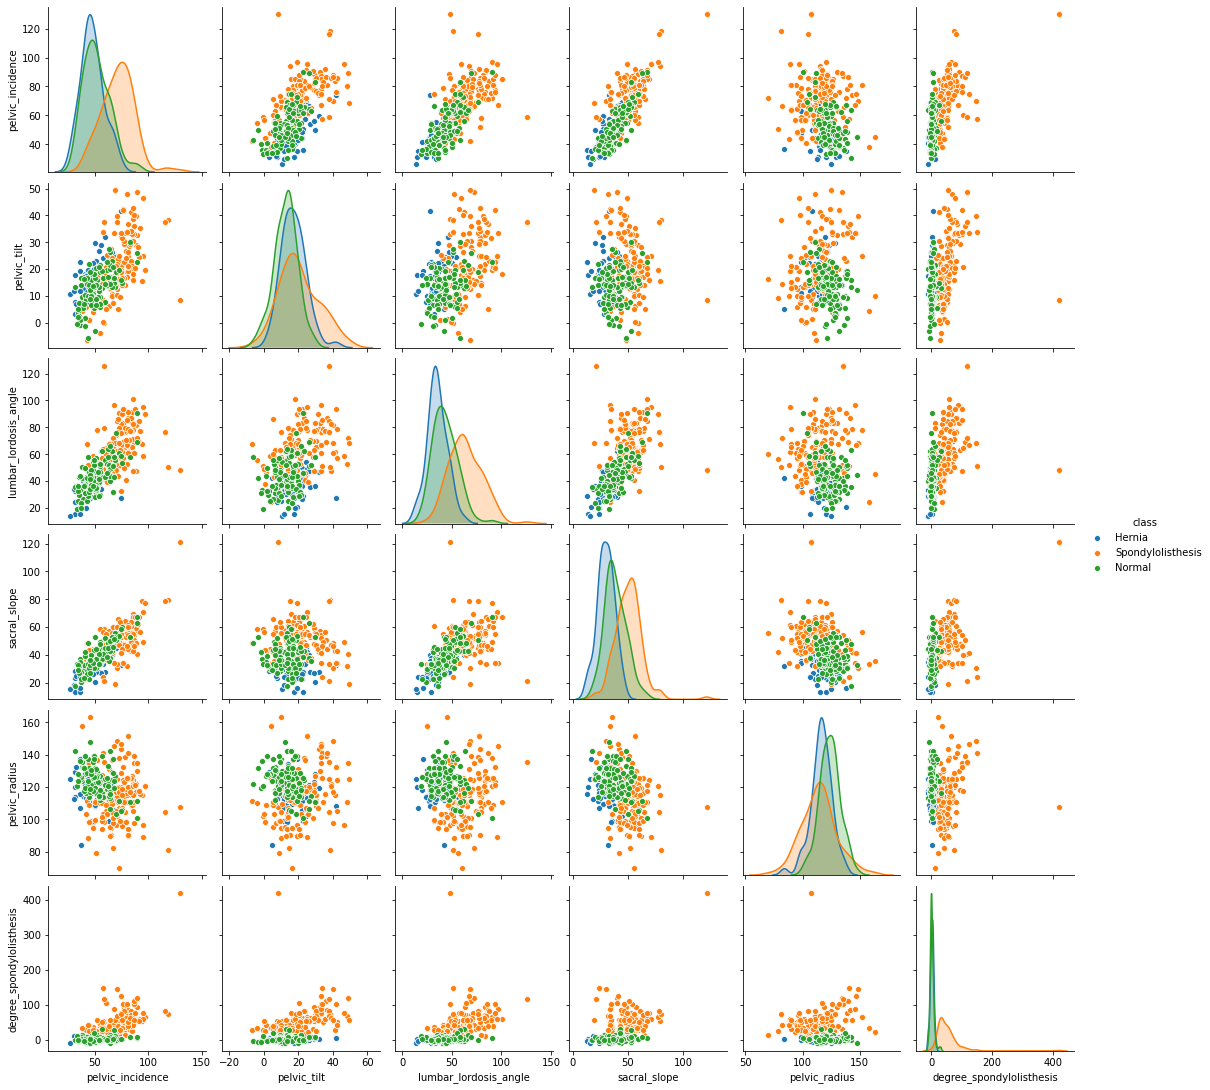

In [28]:
sns.pairplot(class3_df,hue='class')

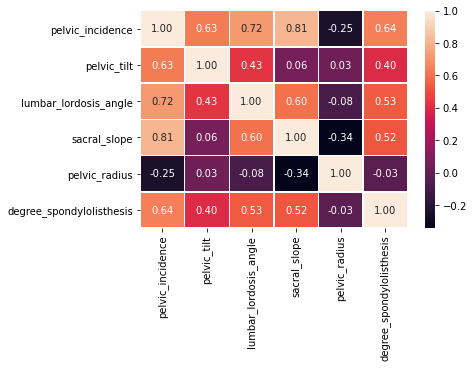

In [29]:
sns.heatmap(class3_df.corr(), annot=True, linewidths=.4, fmt= '.2f')

# Encode the Class variable to integer.

In [30]:
class3_df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder#using lablelencoder to encode the data
le=LabelEncoder()

In [32]:
class3_df['class']=le.fit_transform(class3_df['class'])

In [33]:
class3_df.head().append(class3_df.tail())#checking encoded data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [34]:
class3_target_df=class3_df['class']

In [35]:
class3_feature_df=class3_df.drop(['class'],axis=1)

# Normalize your Data (X) to get values between 0 to 1.

In [36]:
from sklearn.preprocessing import MinMaxScaler#using minmaxscaler to normalize data into 0 and 1
mm_scaler=MinMaxScaler()

In [37]:
X=mm_scaler.fit_transform(class3_feature_df)

# Split the dat as train and test with a ratio of 70:30.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,class3_target_df,test_size = 0.3, random_state=1)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)#building model
knn.fit(X_train,y_train)#training model
knn.predict(X_test)#predicting 

array([2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 0, 2])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [42]:
print("{} nn score:{}".format(3,knn.score(X_test,y_test)))

3 nn score:0.6989247311827957


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

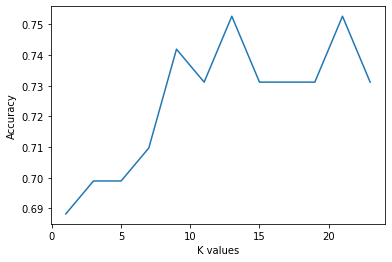

In [43]:
score_list = []
k=list(range(1,25,2))
for each in range(1,25,2):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
# Plotting graph
plt.plot(range(1,25,2),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

In [44]:
max(score_list)

0.7526881720430108

In [45]:
best_k = k[score_list.index(max(score_list))]
best_k

13